# Sandibell Vega


## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [11]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [12]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [13]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [30]:
rocs = []
prcs = []

## Add code for cross-validation here
# Iterate through each fold
logistic_Regress_model = LogisticRegression(max_iter=10000)
for train, test in skf.split(features,labels):
    X_train,X_test = features[train], features[test]
    y_train, y_test = labels[train], labels[test]
# Logistic regression model with max_iter=10000 and no regularization (C set to a high value)
    logistic_Regress_model.fit(X_train,y_train)

    y = logistic_Regress_model.predict_proba(X_test)[:,1]

    roc = roc_auc_score(y_test, y)
    prc = average_precision_score(y_test, y)

    # Append scores to lists
    rocs.append(roc)
    prcs.append(prc)

## Report AUROC and average precision here
average_roc_auc = np.mean(rocs)
average_avg_precision = np.mean(prcs)

# Report the results
print(f"Average Area Under ROC Curve (AUROC): {average_roc_auc}")
print(f"Average Average Precision: {average_avg_precision}")


Average Area Under ROC Curve (AUROC): 0.7983652618135376
Average Average Precision: 0.9256202623235644


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [27]:
# Hyperparameter values for C
cc = [0.01, 0.1, 1, 10, 100, 1000, 10000]

# Prepare arrays to store results
rocs = np.zeros(shape=(len(cc), 5))
prcs = np.zeros(shape=(len(cc), 5))
max_iter = 10000

# Loop over each value of C
for idx, c_value in enumerate(cc):
    # Initialize the model with L2 regularization and the current value of C
    model = LogisticRegression(C=c_value, max_iter=max_iter)
    
    # Perform Stratified K-Fold cross-validation
    for fold_idx, (train_index, test_index) in enumerate(skf.split(features, labels)):
        # Split the data into training and testing sets
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict probabilities for the test set
        y_probs = model.predict_proba(X_test)[:, 1]
        
        # Calculate AUROC and Average Precision for the current fold
        roc = roc_auc_score(y_test, y_probs)
        prc = average_precision_score(y_test, y_probs)
        
        # Store the results
        rocs[idx, fold_idx] = roc
        prcs[idx, fold_idx] = prc

In [28]:
# Compute the average AUROC and Average Precision for each value of C
avg_rocs = np.mean(rocs, axis=1)
avg_prcs = np.mean(prcs, axis=1)

# Find the highest average AUROC and Average Precision
best_roc_idx = np.argmax(avg_rocs)
best_prc_idx = np.argmax(avg_prcs)

best_roc = avg_rocs[best_roc_idx]
best_prc = avg_prcs[best_prc_idx]

best_roc_c = cc[best_roc_idx]
best_prc_c = cc[best_prc_idx]

# Report the highest values of AUROC and Average Precision
print(f"Highest Average AUROC: {best_roc:.4f} (C = {best_roc_c})")
print(f"Highest Average Average Precision: {best_prc:.4f} (C = {best_prc_c})")

Highest Average AUROC: 0.8059 (C = 10)
Highest Average Average Precision: 0.9311 (C = 10)


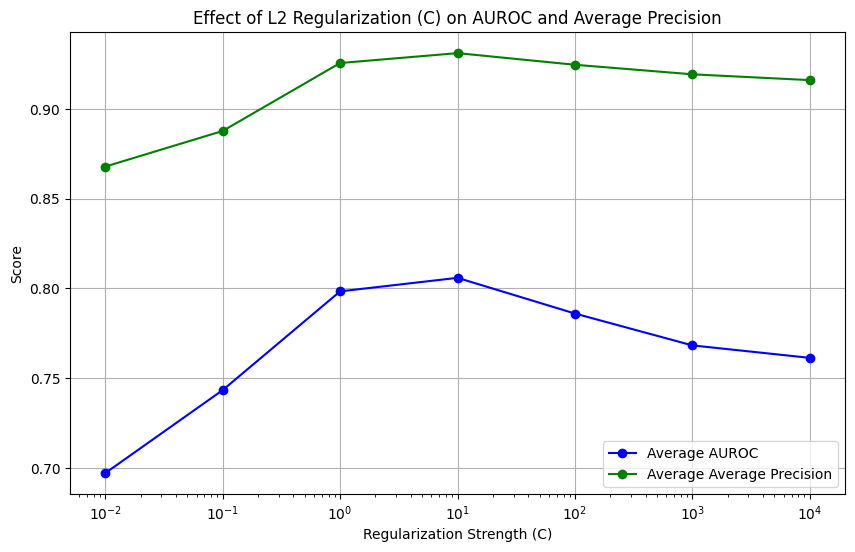

In [29]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(cc, avg_rocs, label='Average AUROC', marker='o', linestyle='-', color='b')
plt.plot(cc, avg_prcs, label='Average Average Precision', marker='o', linestyle='-', color='g')

# Set the logarithmic scale for the x-axis
plt.xscale('log')

# Add labels and title
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Score')
plt.title('Effect of L2 Regularization (C) on AUROC and Average Precision')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()